In [1]:
from scipy import linalg
import numpy as np

We get the conditional number of a matrix by computing: $||A|| ||A||^{-1}$, using SVD and supposing an eucledian norm we can express the conditional number as $\frac{\sigma_{max}}{\sigma_{min}}$. Where the sigmas are the largest and smallest values in the S matrix.

In [12]:
def matrix_cond(A):
    
    import numpy as np
    
    U, S, V = linalg.svd(A)
    
    if min(S) == 0:
        return np.inf
    else:
        return max(S)/min(S)

In [13]:
A = np.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])

In [14]:
matrix_cond(A)

1.7855292155513084e+16

In [15]:
np.linalg.cond(A) # we got the same result

1.7855292155513084e+16

In [20]:
A = np.array([[1, 2], [1, 2]]) #singular matrix

In [21]:
matrix_cond(A)

inf

In [22]:
np.linalg.cond(A)

inf

In [23]:
B = np.random.rand(3, 3)
Q, R = linalg.qr(B)

In [26]:
matrix_cond(Q) #The conditional number of an orthonormal matrix

1.0000000000000002

In [27]:
np.linalg.cond(Q)

1.0000000000000002

### Calculating eigenvalues

In [6]:
def eigen_cond(A):
    
    import numpy as np
    import scipy
    
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    
    λ = scipy.linalg.eigvals(A)
    
    A_t = A + H
    
    λ_t = scipy.linalg.eigvals(A_t)
    
    cond_abs = scipy.linalg.norm(λ - λ_t)/scipy.linalg.norm(H)
    cond_rel = (scipy.linalg.norm(A)/scipy.linalg.norm(λ))*cond_abs
    
    return cond_abs, cond_rel

In [35]:
B = np.random.randn(3, 3)
eigen_cond(B)

(0.6377455257878524, 0.8818383530872543)

In [16]:
def matrix_cond_perturb(x_min, x_max, y_min, y_max, res):
    
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    
    s = list()
    for i in x:
        z = list()
        for j in y:
            A = np.array([[1, i], [j, 1]])
            z.append(eigen_cond(A)[1])
        s.append(z)
    
    s = np.array(s)
    
    return x, y, s

In [23]:
x, y, z = matrix_cond_perturb(-100, 100, -100, 100, 500)

In [21]:
import matplotlib.pyplot as plt

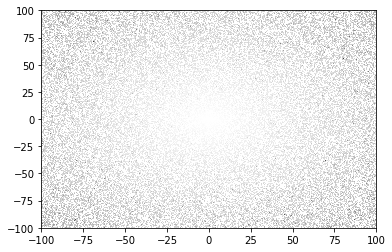

In [24]:
fig, ax = plt.subplots()
ax.pcolormesh(x, y, z, cmap='gray_r')
plt.show()

### Stability

**Least squares**

In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
xk, yk = np.load("stability_data.npy").T

In [5]:
def ols_poly_inv(xk, yk, n):
    
    import numpy as np
    import scipy.linalg as la
    
    A = np.vander(xk, n+1)
    
    return np.matmul(np.matmul(la.inv(np.matmul(A.T, A)), A.T), yk)

In [6]:
ols_poly_inv(xk, yk, 3)

array([ 10.50744001, -24.0032856 ,  13.25644013,   0.46798844])

In [16]:
def ols_poly_qr(xk, yk, n):
    
    import numpy as np
    import scipy.linalg as la
    
    A = np.vander(xk, n+1)
    
    Q, R = la.qr(A, mode = 'economic')
    
    b = np.matmul(Q.T, yk)
    
    return la.solve_triangular(R, b)

In [17]:
ols_poly_qr(xk, yk, 3)

array([ 10.50744001, -24.0032856 ,  13.25644013,   0.46798844])

In [45]:
inv20 = ols_poly_inv(xk, yk, 20)

In [46]:
qr20 = ols_poly_qr(xk, yk, 20)

In [20]:
import matplotlib.pyplot as plt

In [47]:
inv_data = np.polyval(inv20, xk)

In [48]:
qr_data = np.polyval(qr20, xk)

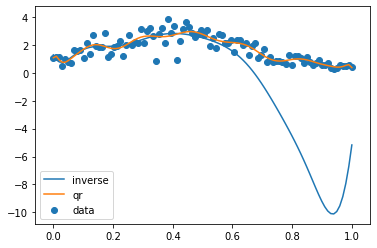

In [49]:
plt.plot(xk, inv_data, label = "inverse")
plt.plot(xk, qr_data, label = "qr")
plt.scatter(xk, yk, label = "data")
plt.legend()
plt.show()

Forward errors of the estimators

In [50]:
def ols_poly_inv_fw_err(xk, yk, n):
    
    import numpy as np
    import scipy.linalg as la
    
    A = np.vander(xk, n+1)
    
    β = np.matmul(np.matmul(la.inv(np.matmul(A.T, A)), A.T), yk)
    
    return la.norm(np.matmul(A, β) - yk)/la.norm(yk)

In [52]:
ols_poly_inv_fw_err(xk, yk, 20)

2.132894173864371

In [53]:
def ols_poly_qr_fw_err(xk, yk, n):
    
    import numpy as np
    import scipy.linalg as la
    
    A = np.vander(xk, n+1)
    
    Q, R = la.qr(A, mode = 'economic')
    
    b = np.matmul(Q.T, yk)
    
    β = la.solve_triangular(R, b)
    
    return la.norm(np.matmul(A, β) - yk)/la.norm(yk)

In [54]:
ols_poly_qr_fw_err(xk, yk, 20)

0.23038054486096685

We can see that the **forward error of the QR estimator is much smaller!**